In [1]:
import pandas as pd
trips=pd.read_csv('./data/trips_data.csv',index_col=0)
# {col:[] for col in trips.columns}
client = pd.DataFrame(
{'salary': [98000],
 'city': ['Краснодар'],
 'age': [50],
 'vacation_preference': ['Архитектура'],
 'transport_preference': ['Самолет'],
 'family_members': [2]})

Предложить клиенту город для путешествия 

In [2]:
trips.head(3)

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney


In [3]:
client

,salary,city,age,vacation_preference,transport_preference,family_members
0,98000,Краснодар,50,Архитектура,Самолет,2


In [4]:
trips[trips.isnull().any(axis=1)]

,salary,city,age,vacation_preference,transport_preference,family_members,target


In [5]:
trips.describe()

,salary,age,family_members
count,1000.000000,1000.000000,1000.000000
mean,111935.000000,55.209000,1.295000
std,54580.049073,11.925164,0.885867
min,0.000000,18.000000,0.000000
25%,68000.000000,50.000000,1.000000
50%,99000.000000,58.000000,1.000000
75%,161000.000000,63.000000,2.000000
max,250000.000000,82.000000,4.000000


In [6]:
trips.loc[trips['salary']==0]

,salary,city,age,vacation_preference,transport_preference,family_members,target
203,0,Краснодар,30,Шоппинг,Автомобиль,0,Paris


<AxesSubplot:>

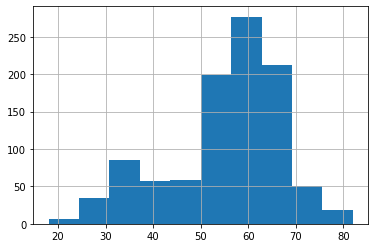

In [7]:
trips['age'].hist()

In [8]:
trips[trips.isin([0]).any(axis=1)].shape

(220, 7)

In [9]:
trips_filled = trips[trips.isin([0]).any(axis=1) == False]
trips_filled.describe()

,salary,age,family_members
count,780.000000,780.000000,780.000000
mean,107800.000000,56.426923,1.660256
std,54445.374869,11.302063,0.631814
min,3000.000000,18.000000,1.000000
25%,66000.000000,53.000000,1.000000
50%,93000.000000,59.000000,2.000000
75%,157000.000000,64.000000,2.000000
max,250000.000000,82.000000,4.000000


In [10]:
trips['city'].value_counts()

Краснодар       307
Томск           267
Хабаровск       107
Киев            106
Омск             84
Екатеринбург     67
Новосибирск      33
Минск            14
Петербург        13
Ярославль         1
Москва            1
Name: city, dtype: int64

In [11]:
trips['vacation_preference'].value_counts()

Архитектура      457
Шоппинг          334
Пляжный отдых    208
Ночные клубы       1
Name: vacation_preference, dtype: int64

In [12]:
trips['transport_preference'].value_counts()

Самолет                389
Автомобиль             379
Поезд                  148
Морской транспорт       83
Космический корабль      1
Name: transport_preference, dtype: int64

In [13]:
trips[trips['transport_preference'] == 'Космический корабль']

,salary,city,age,vacation_preference,transport_preference,family_members,target
568,161000,Новосибирск,63,Пляжный отдых,Космический корабль,2,Tokio


In [14]:
trips['target'].value_counts()

Paris       203
New York    201
Tokio       199
London      199
Sydney      198
Name: target, dtype: int64

In [15]:
trips.loc[trips['city'] == trips['target']]

,salary,city,age,vacation_preference,transport_preference,family_members,target


In [16]:
df = pd.get_dummies(trips, columns=['city','vacation_preference','transport_preference'])
client_df = pd.get_dummies(client,columns=['city','vacation_preference','transport_preference'])

In [17]:
client_df.columns

Index(['salary', 'age', 'family_members', 'city_Краснодар',
       'vacation_preference_Архитектура', 'transport_preference_Самолет'],
      dtype='object')

In [18]:
X = df.drop('target', axis=1)
y = df['target']

In [19]:
client_df = pd.DataFrame(columns=X.columns).append(client_df)
client_df = client_df.fillna(0)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)
model.predict(client_df)

array(['Sydney'], dtype=object)

In [21]:
model.predict_proba(client_df)

array([[0.21992954, 0.1677235 , 0.1712727 , 0.22081445, 0.22025981]])

In [22]:
model.classes_

array(['London', 'New York', 'Paris', 'Sydney', 'Tokio'], dtype=object)

In [23]:
predictions = pd.DataFrame(model.predict_proba(client_df),columns=model.classes_)

In [24]:
predictions

,London,New York,Paris,Sydney,Tokio
0,0.21993,0.167723,0.171273,0.220814,0.22026
